In [1]:
import pandas as pd
import re

In [2]:
f = open('chat2.txt','r' , encoding='utf-8')
data = f.read()

In [3]:

print(data)

23/01/23, 7:53 pm - Shilpa Shukla Ma'am created group "BCA (DS) 4th Sem 2021-24"
23/01/23, 7:53 pm - You were added
08/05/23, 9:17 am - Jaspreet Kaur Ma'am Aravali: Good morning students,
G1 group come into lab
08/05/23, 10:59 am - Pradeep Sir Aravali: https://docs.google.com/forms/d/1T8GKgSb9VrkEEv0wuyxJ5JvYMV8h4PUExGw2t3OS3ZM/edit?usp=drivesdk
08/05/23, 11:00 am - Pradeep Sir Aravali: Dear students, kindly fill this feedback form till 12:00pm
Please use your college email id
https://docs.google.com/forms/d/1T8GKgSb9VrkEEv0wuyxJ5JvYMV8h4PUExGw2t3OS3ZM/edit?usp=drivesdk
08/05/23, 1:38 pm - +91 81788 33502: Students come to lab 2
09/05/23, 9:09 am - +91 81788 33502: https://classroom.google.com/c/NTk2MTgyMzY5ODM4?cjc=znnyzwz
10/05/23, 8:53 pm - Rashika Singh  Ma'am: <Media omitted>
10/05/23, 8:53 pm - Rashika Singh  Ma'am: Dear students, 
Please find the datesheet for External Practical Examination.
Please adhere to the following guidelines strictly: 

1. Be in Formals on the day of Pra

In [4]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s[ap]m\s-\s'

In [5]:
messages = re.split(pattern , data)[1:]
striped_messages = [s.strip() for s in messages]

In [6]:
dates = re.findall(pattern ,data)
striped_dates = [s.strip(' - ') for s in dates]

In [7]:
df  = pd.DataFrame({"date":striped_dates , 'message':striped_messages})

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %I:%M %p')

In [9]:
user = []
message = []

for m in df['message']:
    entry = re.split('([\W\w]+?):\s', m)
    if entry[1:]:
        user.append(entry[1])
        message.append(entry[2])
        
    else:
        user.append('Other Notification')
        message.append(entry[0])
df['users']= user
df['messages'] = message
df.drop(columns=['message'],inplace=True)

In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute



In [11]:
df.head(10)

,date,users,messages,year,month,day,hour,minute
0,2023-01-23 19:53:00,Other Notification,"Shilpa Shukla Ma'am created group ""BCA (DS) 4t...",2023,January,23,19,53
1,2023-01-23 19:53:00,Other Notification,You were added,2023,January,23,19,53
2,2023-05-08 09:17:00,Jaspreet Kaur Ma'am Aravali,"Good morning students,\nG1 group come into lab",2023,May,8,9,17
3,2023-05-08 10:59:00,Pradeep Sir Aravali,https://docs.google.com/forms/d/1T8GKgSb9VrkEE...,2023,May,8,10,59
4,2023-05-08 11:00:00,Pradeep Sir Aravali,"Dear students, kindly fill this feedback form ...",2023,May,8,11,0
5,2023-05-08 13:38:00,+91 81788 33502,Students come to lab 2,2023,May,8,13,38
6,2023-05-09 09:09:00,+91 81788 33502,https://classroom.google.com/c/NTk2MTgyMzY5ODM...,2023,May,9,9,9
7,2023-05-10 20:53:00,Rashika Singh Ma'am,<Media omitted>,2023,May,10,20,53
8,2023-05-10 20:53:00,Rashika Singh Ma'am,,2023,May,10,20,53
9,2023-05-11 09:55:00,+91 81788 33502,,2023,May,11,9,55


In [12]:
from urlextract import URLExtract

extractor = URLExtract()

urls = extractor.find_urls("https://www.youtube.com/watch?v=Q0QwvZKG_6Q  dafasdfa")

In [13]:
df2 =df[df["users"]=="Pradeep Sir Aravali"]

In [14]:
# df2.sample(20)

In [15]:
links = []

for msg in df2['messages']:
    if extractor.find_urls(msg):
        links.extend(extractor.find_urls(msg))

In [16]:
len(links)

12

In [17]:
round((df['users'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'users': 'name' ,'count':'percent' })

,name,percent
0,Pradeep Sir Aravali,27.06
1,Pradeep Acem Assistant Professor,20.00
2,Rashika Singh Ma'am,19.53
3,+91 81788 33502,10.59
4,+91 88007 23460,5.65
5,Amita Pathania Ma'am,4.94
6,Other Notification,3.76
7,+91 98718 34975,3.53
8,+91 90502 40447,1.65
9,Jaspreet Kaur Ma'am Aravali,1.18


In [18]:
round(sum(round((df['users'].value_counts()/df.shape[0])*100,2)))

100

In [19]:
x = df['users'].value_counts().head(5)

In [20]:
import matplotlib.pyplot as plt

In [21]:
name = x.index
count = x.values

In [22]:
count

array([115,  85,  83,  45,  24], dtype=int64)

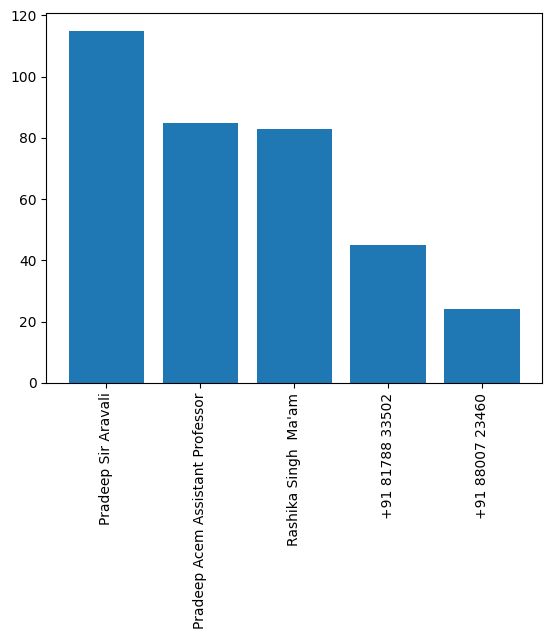

In [23]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
df

,date,users,messages,year,month,day,hour,minute
0,2023-01-23 19:53:00,Other Notification,"Shilpa Shukla Ma'am created group ""BCA (DS) 4t...",2023,January,23,19,53
1,2023-01-23 19:53:00,Other Notification,You were added,2023,January,23,19,53
2,2023-05-08 09:17:00,Jaspreet Kaur Ma'am Aravali,"Good morning students,\nG1 group come into lab",2023,May,8,9,17
3,2023-05-08 10:59:00,Pradeep Sir Aravali,https://docs.google.com/forms/d/1T8GKgSb9VrkEE...,2023,May,8,10,59
4,2023-05-08 11:00:00,Pradeep Sir Aravali,"Dear students, kindly fill this feedback form ...",2023,May,8,11,0
...,...,...,...,...,...,...,...,...
420,2024-07-08 10:18:00,Pradeep Acem Assistant Professor,tarang you too give me a whatsapp call.,2024,July,8,10,18
421,2024-07-09 12:32:00,Rashika Singh Ma'am,<Media omitted>,2024,July,9,12,32
422,2024-07-09 12:33:00,Rashika Singh Ma'am,Information of Supplementary Exam Centre,2024,July,9,12,33
423,2024-07-09 12:46:00,Rashika Singh Ma'am,<Media omitted>,2024,July,9,12,46


In [25]:
temp = df[df['users'] != 'Other Notification']
temp =temp[temp['messages']!='<Media omitted>']
temp =temp[temp['messages']!='']
temp.sample(10)


,date,users,messages,year,month,day,hour,minute
381,2024-05-18 18:09:00,Rashika Singh Ma'am,Interested Students kindly mail your resume on...,2024,May,18,18,9
417,2024-07-08 09:28:00,Rashika Singh Ma'am,Last reminder to fill the form by today positi...,2024,July,8,9,28
358,2024-05-13 12:34:00,Pradeep Acem Assistant Professor,Anil-14\nHimanshu -22\nLokender-31\nUjjwal-57\...,2024,May,13,12,34
169,2023-08-24 14:32:00,Amita Pathania Ma'am,G2 Group come to your lab no 1,2023,August,24,14,32
267,2024-03-20 10:46:00,Amita Pathania Ma'am,Come to lab 1,2024,March,20,10,46
125,2023-07-28 16:36:00,Rashika Singh Ma'am,"Dear students,\nYou are advised not to do any ...",2023,July,28,16,36
263,2024-03-20 10:10:00,Pradeep Acem Assistant Professor,Students aap logo ko baat samajh nhi aati,2024,March,20,10,10
181,2023-08-28 14:49:00,Rashika Singh Ma'am,Interested students please fill the sheet \n\n...,2023,August,28,14,49
14,2023-05-16 07:22:00,Pradeep Sir Aravali,Dear students\nPlease clear your no dues befor...,2023,May,16,7,22
3,2023-05-08 10:59:00,Pradeep Sir Aravali,https://docs.google.com/forms/d/1T8GKgSb9VrkEE...,2023,May,8,10,59


In [26]:
f = open('stop_hinglish.txt' , 'r')

In [27]:

stop_words = f.read()


In [28]:

print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
gya
baat
pta
gyi
null
bss
krta
kro
chii
bro
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chh

In [29]:
words = []

for message in temp['messages']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [30]:

words

['morning',
 'students,',
 'g1',
 'group',
 'lab',
 'https://docs.google.com/forms/d/1t8gkgsb9vrkeev0wuyxj5jvymv8h4puexgw2t3os3zm/edit?usp=drivesdk',
 'dear',
 'students,',
 'kindly',
 'fill',
 'feedback',
 'form',
 '12:00pm',
 'college',
 'email',
 'https://docs.google.com/forms/d/1t8gkgsb9vrkeev0wuyxj5jvymv8h4puexgw2t3os3zm/edit?usp=drivesdk',
 'students',
 'lab',
 'https://classroom.google.com/c/ntk2mtgymzy5odm4?cjc=znnyzwz',
 'dear',
 'students,',
 'submit',
 'dues',
 'won’t',
 'allowed',
 'sit',
 'external',
 'practical',
 'examination.',
 'submitted,',
 'kindly',
 'ignore.',
 'dear',
 'students,',
 'tomorrow’s',
 'external',
 'practical,',
 'report',
 'sharp',
 'am.',
 'college.',
 '*please',
 'time.',
 '*',
 'dear',
 'students',
 'information',
 'external',
 'practical',
 'start',
 'sharp',
 '9:00am',
 'tomorrow',
 'dear',
 'students',
 'dues',
 '9:30',
 'send',
 'screenshot',
 'personally',
 'morning',
 'students',
 'dues',
 'submit',
 ',',
 '10:00',
 'positively',
 'pradeep',


In [31]:
from collections import Counter


pd.DataFrame(Counter(words).most_common(50))

,0,1
0,students,90
1,dear,63
2,fill,43
3,"students,",38
4,kindly,33
5,form,22
6,college,20
7,lab,19
8,feedback,18
9,interested,18


In [32]:

def get_message(w):
    df1 = pd.DataFrame(columns=df.columns)    
    for idx, msg in df.iterrows():
        if w in msg['messages'].split():
            df1 = pd.concat([df1, df.loc[[idx]]], ignore_index=True)
    
    return df1
                
            
    
            
        

In [33]:
get_message('sanskar')


,date,users,messages,year,month,day,hour,minute
0,2023-07-06 10:53:00,Pradeep Sir Aravali,Sahaj sanskar,2023,July,6,10,53


In [34]:
def get_timed_msg(clm_name , cell):
    
    return df[df[clm_name]==cell]

In [35]:
get_timed_msg('date' , '2023-12-22 00:02:00')

,date,users,messages,year,month,day,hour,minute


In [36]:
import emoji
def emoji_counter(df1):
    emojis = []
    
    for message in df1['messages']:
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
emoji_counter(df)

In [37]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

NameError: name 'emojis' is not defined

In [ ]:
emoji_df.head(30)

In [38]:
df['month_num'] = df.date.dt.month

In [39]:
df.head()

,date,users,messages,year,month,day,hour,minute,month_num
0,2023-01-23 19:53:00,Other Notification,"Shilpa Shukla Ma'am created group ""BCA (DS) 4t...",2023,January,23,19,53,1
1,2023-01-23 19:53:00,Other Notification,You were added,2023,January,23,19,53,1
2,2023-05-08 09:17:00,Jaspreet Kaur Ma'am Aravali,"Good morning students,\nG1 group come into lab",2023,May,8,9,17,5
3,2023-05-08 10:59:00,Pradeep Sir Aravali,https://docs.google.com/forms/d/1T8GKgSb9VrkEE...,2023,May,8,10,59,5
4,2023-05-08 11:00:00,Pradeep Sir Aravali,"Dear students, kindly fill this feedback form ...",2023,May,8,11,0,5


In [40]:
timeline = df.groupby(['year' , 'month_num' ,'month']).count()['messages'].reset_index()

In [41]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [42]:
timeline['time'] = time 

In [43]:
timeline

,year,month_num,month,messages,time
0,2023,1,January,2,January-2023
1,2023,5,May,50,May-2023
2,2023,6,June,34,June-2023
3,2023,7,July,52,July-2023
4,2023,8,August,49,August-2023
5,2023,9,September,22,September-2023
6,2024,2,February,35,February-2024
7,2024,3,March,37,March-2024
8,2024,4,April,34,April-2024
9,2024,5,May,83,May-2024


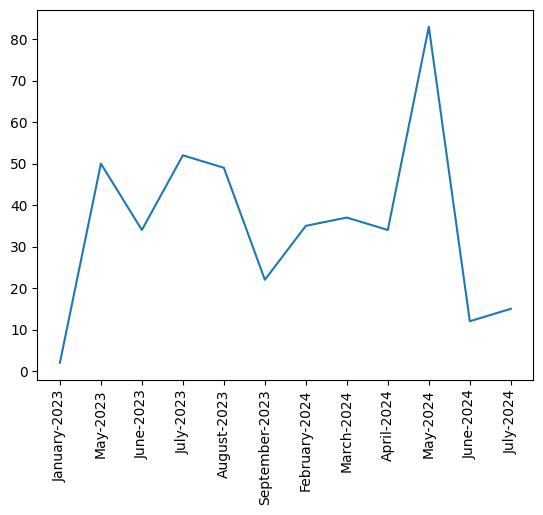

In [44]:
plt.plot(timeline.time , timeline.messages)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df['only_date'] = df['date'].dt.date

In [52]:
daily_timeline = df.groupby('only_date').count()['messages'].reset_index()

In [53]:
daily_timeline

,only_date,messages
0,2023-01-23,2
1,2023-05-08,4
2,2023-05-09,1
3,2023-05-10,2
4,2023-05-11,2
...,...,...
124,2024-06-07,3
125,2024-07-02,3
126,2024-07-03,4
127,2024-07-08,4


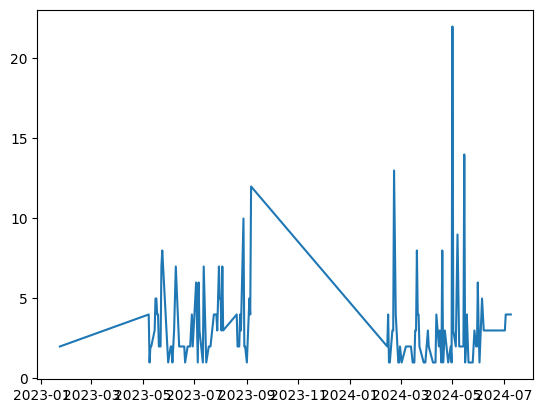

In [54]:
plt.figure()
plt.plot(daily_timeline['only_date'] , daily_timeline['messages'])